In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions.feedback import KMeansSegmentation, VectorSegmenter, HyperplaneSegmentation
from functions.funcs import get_kxk_square, get_kxk_square_values, assess_square, signal_results, row_agg, hash, kmeans_step, plane_step, initialize_segmenters
from functions.classifiers3x3 import c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13

# Create vector of zeros length 364, to be modified when learning starts
kmeans_amps = np.zeros(364)
plane_amps = np.zeros(364)

test = pd.read_csv('digit-recognizer/test.csv')
train = pd.read_csv('digit-recognizer/train.csv')
labels = train.iloc[:, 0] 
data = train.iloc[:, 1:]  

kmeans_segmenter, plane_segmenter = initialize_segmenters(num_sections=11, len=364)

ModuleNotFoundError: No module named 'classifiers3x3'

In [2]:
num_sections = 11

kmeans_count=0
plane_count=0
kmeans_correct_pct = []
plane_correct_pct = []

num_train = 1000
num_iters = 5

for j in range(num_iters):
    print(f"-----------------------Iteration {j}-----------------------")
    for i in range(num_train):
        kmeans_amps, kmeans_correct = kmeans_step(data=data, image=i, kmeans_amps=kmeans_amps, 
                                            labels=labels, kmeans_segmenter=kmeans_segmenter, num_sections=num_sections)
        kmeans_count += kmeans_correct
        if (i == 0 and j == 0):
            kmeans_correct_pct.append(0)
        else:
            kmeans_correct_pct.append(kmeans_count / ((j*num_train) + i))

-----------------------Iteration 0-----------------------
-----------------IMAGE 0-----------------
kmeans no match: guess = 6 , actual = 1
-----------------IMAGE 1-----------------
kmeans no match: guess = 3 , actual = 0
-----------------IMAGE 2-----------------
kmeans no match: guess = 5 , actual = 1
-----------------IMAGE 3-----------------
kmeans no match: guess = 6 , actual = 4
-----------------IMAGE 4-----------------
kmeans no match: guess = 6 , actual = 0
-----------------IMAGE 5-----------------
kmeans no match: guess = 6 , actual = 0
-----------------IMAGE 6-----------------
kmeans no match: guess = 5 , actual = 7
-----------------IMAGE 7-----------------
kmeans no match: guess = 6 , actual = 3
-----------------IMAGE 8-----------------
kmeans no match: guess = 6 , actual = 5
-----------------IMAGE 9-----------------
kmeans no match: guess = 6 , actual = 3
-----------------IMAGE 10-----------------
kmeans no match: guess = 9 , actual = 8
-----------------IMAGE 11--------------

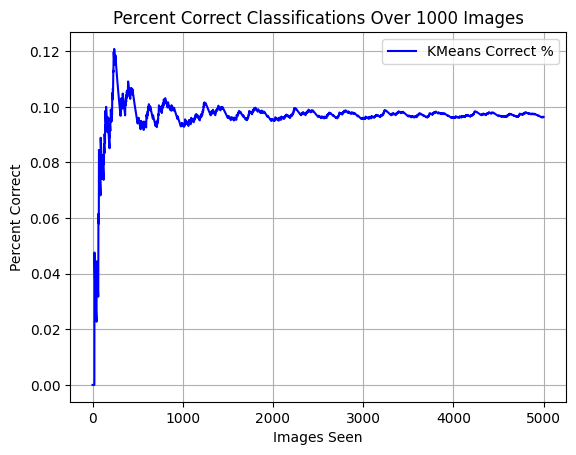

In [3]:
# Create a time axis from 0 to 99
time = np.arange(len(kmeans_correct_pct))

# Plot the values over time

plt.plot(time, kmeans_correct_pct, linestyle='-', color='b', label='KMeans Correct %')
# plt.plot(time, plane_correct_pct, linestyle='-', color='r', label='Plane Correct %')
plt.xlabel("Images Seen")
plt.ylabel("Percent Correct")
plt.title(f"Percent Correct Classifications Over {num_train} Images")
plt.grid(True)
plt.legend()
plt.show()